<a href="https://colab.research.google.com/github/ladiaJeong/-01-classification/blob/master/%5B07%5D_%EC%B9%B4%EB%A9%94%EB%9D%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4%EC%95%B1_%EB%A7%8C%EB%93%A4%EA%B8%B0_%EA%B3%A0%EC%96%91%EC%9D%B4%EC%88%98%EC%97%BC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os   #os에 있는 자원 연결 및 제어
import cv2  #open cv 라이브러리 - 컴퓨터 비젼 관련 프로그래밍을 도움
import matplotlib.pyplot as plt  # 데이터를 도식화
import numpy as np   # 다차원 배열을 쉽게 처리, 효율적으로 사용
import dlib   #이미지 처리 및 기계학습, 얼굴인식을 할 수 있는 c++
print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## Step 1. 스티커 구하기 or 만들기

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

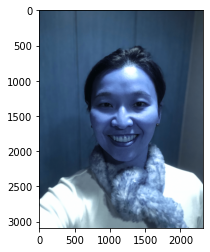

In [ ]:
my_image_path = 'aiffel/camera_sticker/images/7.png' # 본인 이미지 경로
img_bgr = cv2.imread(my_image_path) # open cv 이미지 부르기 (brg 파녹빨)
img_show = img_bgr.copy() # 카피해서 출력용 이미지 보관
plt.imshow(img_bgr) # 이미지 출력을 위해 올려줌
plt.show() #이미지 출력

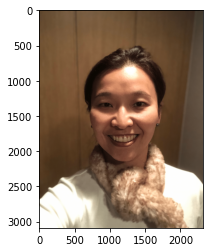

In [ ]:
#RGB로 컨버트 해줍니다.
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 얼굴검출(HOG, SVM)

In [ ]:
detector_hog = dlib.get_frontal_face_detector() #기본 얼굴 감지기를 반환
print("잘되고 있나?")

잘되고 있나?


In [ ]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # dlib은 알쥐비로 입력을 받기때문에 변환
print('잘되고 있나?')

잘되고 있나?


rectangles[[(613, 997) (1763, 2147)]]


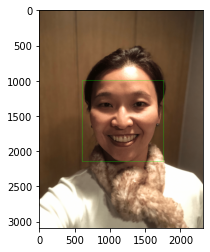

In [ ]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크

#### $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

#### $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models

#### $ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
#저장한 landmark 모델 불러오기
import dlib
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []
  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
   

68


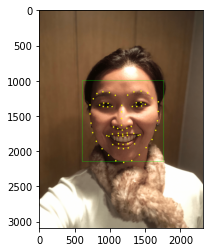

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

#### 랜드마크 노란점이 어떤사진은 보이고, 어떤사진은 안보여서 난감했었다. 인물의 얼굴이 작은 사진은 잘 보이고, 증명사진처럼 얼굴이 클 수록 노란점이 안보여서 cv2.circle(img_show, point, 10, (0, 255, 255), -1) 에서 point 값을 키워주니 해결되었다. 
#### 사람수가 늘어날때 인물마다 모두 랜드마크를 형성하였다. 

## Step 3. 스티커 적용 위치 확인하기

In [ ]:
#코 위치확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1167, 1632)
(x,y) : (1167,1632)
(w,h) : (1151,1151)


In [ ]:
#스티커 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인

(1151, 1151, 3)


In [ ]:

refined_x = x - w //2
refined_y = y - h //2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


(x,y) : (592,1057)


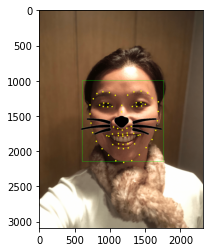

In [ ]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

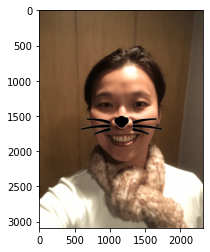

In [ ]:
# 얼굴인식 박스와 랜드마크 제거
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

rectangles[[(1034, 1466) (1589, 2021)]]


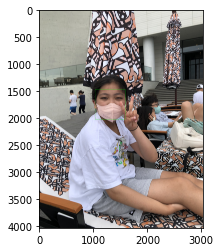

68


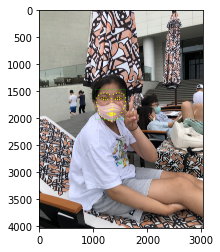

(1350, 1800)
(x,y) : (1350,1800)
(w,h) : (556,556)
(556, 556, 3)
(x,y) : (1072,1522)


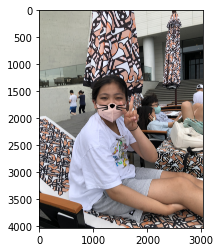

In [ ]:
my_image_path = 'aiffel/camera_sticker/images/1-3.png' # 본인 이미지 경로
img_bgr = cv2.imread(my_image_path) # open cv 이미지 부르기 (brg 파녹빨)
img_show = img_bgr.copy() # 카피해서 출력용 이미지 보관

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)
   
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
           
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
 
plt.imshow(img_show_rgb)

plt.show()

    #코 위치확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    #스티커 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인


refined_x = x - w //2
refined_y = y - h //2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

rectangles[[(724, 724) (1389, 1390)], [(2045, 710) (2120, 785)]]


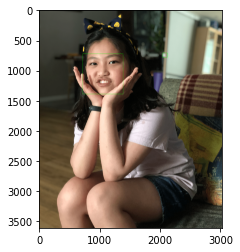

68


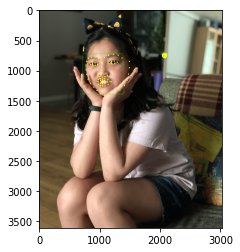

(1028, 1065)
(x,y) : (1028,1065)
(w,h) : (666,666)
(2093, 752)
(x,y) : (2093,752)
(w,h) : (76,76)
(76, 76, 3)
(x,y) : (2055,714)


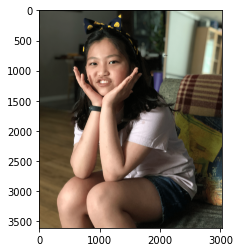

In [ ]:
my_image_path = 'aiffel/camera_sticker/images/1-4.png' # 본인 이미지 경로
img_bgr = cv2.imread(my_image_path) # open cv 이미지 부르기 (brg 파녹빨)
img_show = img_bgr.copy() # 카피해서 출력용 이미지 보관

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)
   
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
           
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
 
plt.imshow(img_show_rgb)

plt.show()

    #코 위치확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    #스티커 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인


refined_x = x - w //2
refined_y = y - h //2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

rectangles[[(370, 88) (444, 163)], [(204, 156) (266, 218)]]


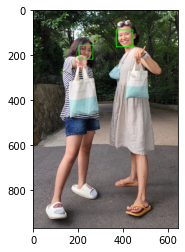

68


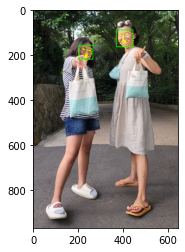

(402, 128)
(x,y) : (402,128)
(w,h) : (75,75)
(240, 192)
(x,y) : (240,192)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (209,161)


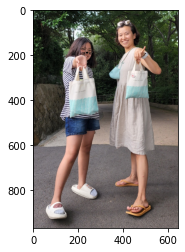

In [ ]:
my_image_path = 'aiffel/camera_sticker/images/2-1.png' # 본인 이미지 경로
img_bgr = cv2.imread(my_image_path) # open cv 이미지 부르기 (brg 파녹빨)
img_show = img_bgr.copy() # 카피해서 출력용 이미지 보관

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)
   
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
           
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
 
plt.imshow(img_show_rgb)

plt.show()

    #코 위치확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    #스티커 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인


refined_x = x - w //2
refined_y = y - h //2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

rectangles[[(2143, 1836) (2698, 2390)], [(418, 2045) (803, 2430)], [(1274, 2045) (1659, 2430)]]


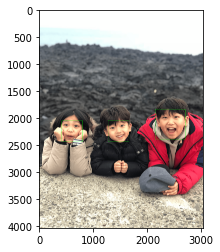

68


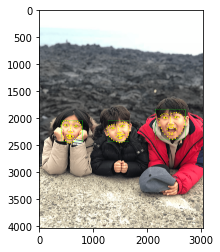

(2431, 2094)
(x,y) : (2431,2094)
(w,h) : (556,556)
(579, 2228)
(x,y) : (579,2228)
(w,h) : (386,386)
(1476, 2250)
(x,y) : (1476,2250)
(w,h) : (386,386)
(386, 386, 3)
(x,y) : (1283,2057)


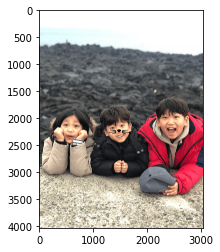

In [ ]:
my_image_path = 'aiffel/camera_sticker/images/3-1.png' # 본인 이미지 경로
img_bgr = cv2.imread(my_image_path) # open cv 이미지 부르기 (brg 파녹빨)
img_show = img_bgr.copy() # 카피해서 출력용 이미지 보관

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)
   
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
           
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
 
plt.imshow(img_show_rgb)

plt.show()

    #코 위치확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    #스티커 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인


refined_x = x - w //2
refined_y = y - h //2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

### 회고

### 1. 랜드마크가 잘 안찍혀서 고생을 했다.    cv2.circle(img_show, point, 10, (0, 255, 255), -1)에서 point의 크기를 10으로 바꾸어주니 잘 보였다. 기존의 코드로는 찍히긴 했는데 크기가 작아서 안 보여는 거였다.
### 2. 한사람만 나온 사진을 비교해 보면, 얼굴 윤곽까지 전체가 잘 나온 사진은 랜드마크를 잘 찾지만, 손으로 턱에 꽃받침을 하고 있어서서 귀 아래로 얼굴 윤곽선을 찾지 못하면 인식이 잘 되지 않았다. 
### 3. 두, 세사람이 나온 사진에서 얼굴의 위치를 읽을때 나중에 읽은 사람에게 스티커를 달아 주는 경향을 보였다. 모두에게 스티커를 붙여주고 싶었다. 
### 4. 얼굴이 아닌 부분의 좌표가 가끔 잡혔는데 그런경우에는 x,y좌표만 있고, w,h좌표는 잡히지 않았다. 
### 5. 실생활에서 잘 쓰이는 것을 따라하고 개발하니 흥미도가 높았다. 
